In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/OMKAR DHADAM/OneDrive/Desktop/OKK/EXCEL/SIR_VACATION_PRACTICE/DATA_CLEANING/Banking_Insurance.csv")

In [3]:
df.head()

,Client_ID,Client_Name,Industry_Sector,Country,Annual_Revenue_USD,Number_of_Employees,Risk_Score,Insurance_Premium_USD,Claims_Made_Last_12_Months,Last_Claim_Amount_USD,Policy_Start_Date,Policy_End_Date,Is_High_Risk,Notes
0,C0858,NextGen Enterprises,NaN,NaN,1812503.0,3685,19.0,47998.0,Y,42043,2023-11-02,2025-03-29,No,Late claims
1,C0709,Prime Enterprises,Telecom,India,9794402.0,3618,70.0,44121.0,Y,56984,2020-06-29,2026-01-20,Y,Data mismatch
2,C0477,Allied Corp,Healthcare,UK,775510.0,4076,33.0,60103.0,N,23185,2018-05-31,2026-08-25,N,Frequent small claims
3,C0143,Allied Enterprises,Retail,India,6800379.0,3826,63.0,88555.0,YES,16193,2020-05-10,2026-03-20,Yes,Clean history
4,C0150,Global Ltd,Retail,Singapore,2335000.0,3900,86.0,96703.0,Y,12360,2019-09-05,2026-02-14,No,Late claims


# Checking Columns Datatypes

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_ID                   1000 non-null   object 
 1   Client_Name                 1000 non-null   object 
 2   Industry_Sector             950 non-null    object 
 3   Country                     932 non-null    object 
 4   Annual_Revenue_USD          950 non-null    float64
 5   Number_of_Employees         1000 non-null   int64  
 6   Risk_Score                  950 non-null    float64
 7   Insurance_Premium_USD       950 non-null    float64
 8   Claims_Made_Last_12_Months  1000 non-null   object 
 9   Last_Claim_Amount_USD       1000 non-null   int64  
 10  Policy_Start_Date           982 non-null    object 
 11  Policy_End_Date             1000 non-null   object 
 12  Is_High_Risk                1000 non-null   object 
 13  Notes                       1000 n

# Issues in  columns Datatypes

#### 1. Last_Claim_Amount_USD - int64 --> float64
#### 2. Policy_Start_Date - object --> datetime
#### 3. Policy_End_Date - object --> datetime

# Checking Outliers

In [21]:
df.describe().round()

,Annual_Revenue_USD,Number_of_Employees,Risk_Score,Insurance_Premium_USD,Last_Claim_Amount_USD
count,950.0,1000.0,950.0,950.0,1000.0
mean,4968762.0,2525.0,49.0,105239.0,49448.0
std,2786677.0,1437.0,29.0,56992.0,29136.0
min,139353.0,51.0,1.0,5138.0,112.0
25%,2641691.0,1291.0,23.0,56207.0,24158.0
50%,4995031.0,2523.0,48.0,104932.0,47824.0
75%,7202966.0,3763.0,75.0,156335.0,75659.0
max,9989550.0,4994.0,100.0,199994.0,99977.0


## Checking Outliers with IOR

In [5]:
q1=df['Annual_Revenue_USD'].quantile(0.25)
q3=df['Annual_Revenue_USD'].quantile(0.75)

In [6]:
iqr=q3-q1
iqr

np.float64(4561274.5)

In [7]:
ll=q1-1.5*iqr
ll

np.float64(-4200220.5)

In [8]:
ul=q3+1.5*iqr
ul

np.float64(14044877.5)

In [9]:
for i in df.columns:
    if (df[i].dtype=='int64') | (df[i].dtype=='float64'): 
        print(i)
        print(df[(df['Annual_Revenue_USD']<ll) | (df['Annual_Revenue_USD']>ul)].shape)


Annual_Revenue_USD
(0, 14)
Number_of_Employees
(0, 14)
Risk_Score
(0, 14)
Insurance_Premium_USD
(0, 14)
Last_Claim_Amount_USD
(0, 14)


# Identifying Outliers with BoxPlot

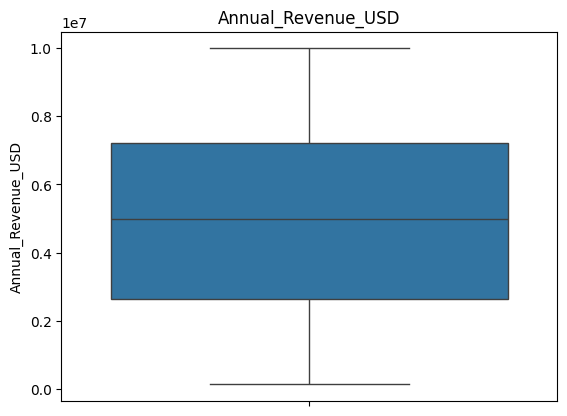

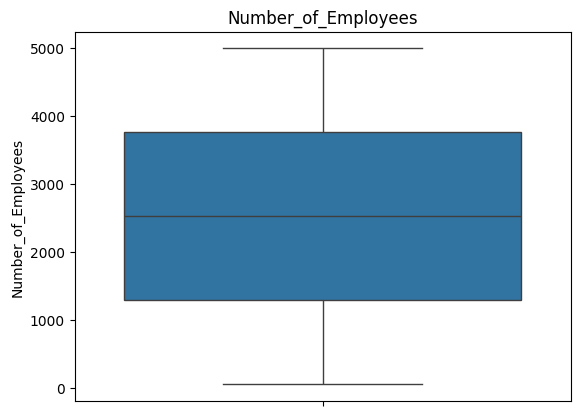

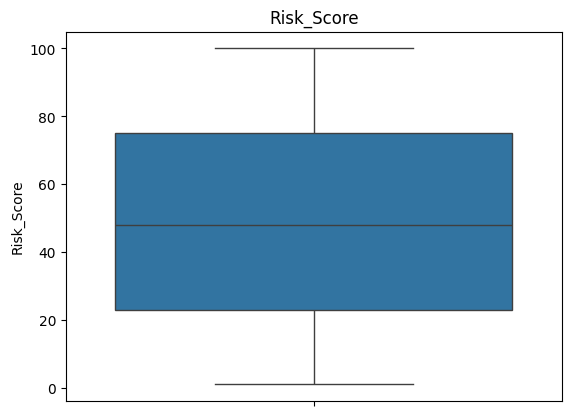

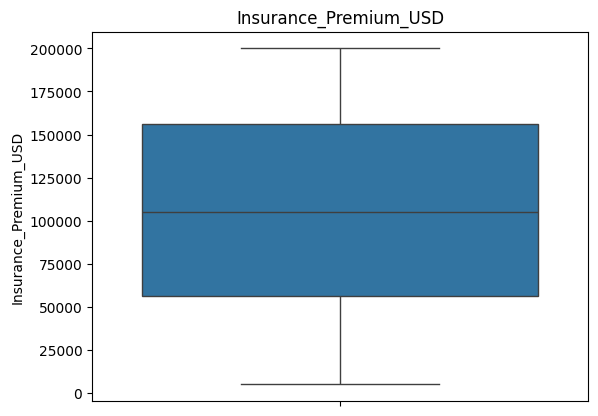

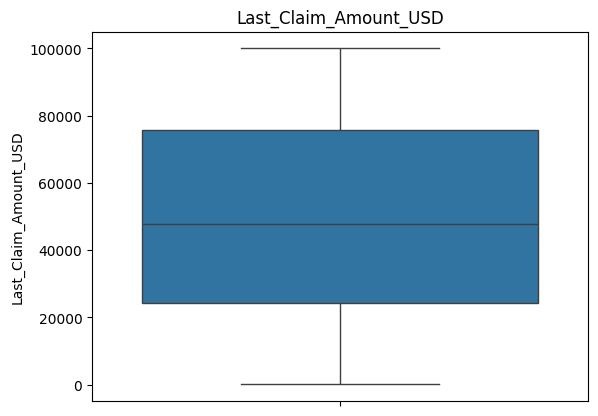

In [108]:
for i in df.columns:
    if (df[i].dtype=='int64') | (df[i].dtype=='float64'):
        plt.title(i)
        sns.boxplot(y=df[i])
        plt.show()

# Identifying Null Values

In [110]:
df.isnull().sum()

Client_ID                      0
Client_Name                    0
Industry_Sector               50
Country                       68
Annual_Revenue_USD            50
Number_of_Employees            0
Risk_Score                    50
Insurance_Premium_USD         50
Claims_Made_Last_12_Months     0
Last_Claim_Amount_USD          0
Policy_Start_Date             18
Policy_End_Date                0
Is_High_Risk                   0
Notes                          0
dtype: int64

### Null Values found
#### 1. Industry_Sector 
#### 2. Country
#### 3. Annual_Revenue_USD
#### 4. Risk_Score
#### 5. Insurance_Premium_USD
#### 6. Policy_Start_Date

# Identifying Duplicate Rows

In [113]:
df[df.duplicated()].shape

(0, 14)

# checking for duplicates in Primary Column

In [114]:
df[df['Client_ID'].duplicated()].shape

(0, 14)

# Handling Missing Values

#### 1. Industry_Sector

In [65]:
df['Industry_Sector'].isnull().sum()

np.int64(50)

In [66]:
df['Industry_Sector'].value_counts()

Industry_Sector
Energy                    150
Financial Institutions    148
Manufacturing             141
Technology                138
Telecom                   132
Healthcare                132
Retail                    109
Name: count, dtype: int64

In [67]:
df['Industry_Sector']=df['Industry_Sector'].fillna("Unknown")

In [68]:
df['Industry_Sector'].isnull().sum()

np.int64(0)

#### 2. Country

In [69]:
df['Country'].isnull().sum()

np.int64(68)

In [70]:
df['Country'].value_counts()

Country
Germany      139
Australia    138
India        135
USA          133
Canada       131
Singapore    128
UK           128
Name: count, dtype: int64

In [71]:
df['Country'].isnull().sum()

np.int64(68)

In [72]:
df['Country']=df['Country'].fillna("Unknown")

In [73]:
df['Country'].isnull().sum()

np.int64(0)

#### 3. Annual_Revenue_USD

In [74]:
df['Annual_Revenue_USD'].isnull().sum()

np.int64(0)

##### As there are no outliers in this column so we will fill with mean()

In [75]:
df['Annual_Revenue_USD']=df['Annual_Revenue_USD'].fillna(df['Annual_Revenue_USD'].mean())

In [76]:
df['Annual_Revenue_USD'].isnull().sum()

np.int64(0)

#### 4. Risk_Score

In [77]:
df['Risk_Score'].describe()

count    1000.000000
mean       49.205263
std        28.587449
min         1.000000
25%        24.000000
50%        49.205263
75%        73.000000
max       100.000000
Name: Risk_Score, dtype: float64

In [78]:
df['Risk_Score']=df['Risk_Score'].fillna(df['Risk_Score'].mean())

In [79]:
df['Risk_Score'].isnull().sum()

np.int64(0)

#### 5. Insurance_Premium_USD

In [80]:
df['Insurance_Premium_USD'].isnull().sum()

np.int64(0)

In [81]:
df['Insurance_Premium_USD'].describe()

count      1000.000000
mean     105238.548421
std       55547.465691
min        5138.000000
25%       59092.500000
50%      105238.548421
75%      155028.000000
max      199994.000000
Name: Insurance_Premium_USD, dtype: float64

In [82]:
df['Insurance_Premium_USD']=df['Insurance_Premium_USD'].fillna(df['Insurance_Premium_USD'].mean())

In [83]:
df['Insurance_Premium_USD'].isnull().sum()

np.int64(0)

#### 6. Policy_Start_Date

In [60]:
df['Policy_Start_Date'].isnull().sum()

np.int64(18)

In [84]:
df['Policy_Start_Date'] = pd.to_datetime(df['Policy_Start_Date'], errors='coerce')

In [85]:
df.isnull().sum()

Client_ID                      0
Client_Name                    0
Industry_Sector                0
Country                        0
Annual_Revenue_USD             0
Number_of_Employees            0
Risk_Score                     0
Insurance_Premium_USD          0
Claims_Made_Last_12_Months     0
Last_Claim_Amount_USD          0
Policy_Start_Date             18
Policy_End_Date                0
Is_High_Risk                   0
Notes                          0
dtype: int64

# FIXING INCONSISTENT FORMATTING OF VALUES

In [86]:
for i in df.columns:
    print(df[i].value_counts())
    print("-------------------------------------------")

Client_ID
C0281    1
C0858    1
C0709    1
C0477    1
C0143    1
        ..
C0176    1
C0170    1
C0887    1
C0289    1
C0943    1
Name: count, Length: 1000, dtype: int64
-------------------------------------------
Client_Name
XYZ Ltd                41
Allied Solutions       41
Secure Pvt             36
NextGen Pvt            35
XYZ Corp               35
NextGen Enterprises    34
Global Pvt             33
Allied Ltd             32
Allied Corp            32
ABC Solutions          32
XYZ Enterprises        32
Global Solutions       31
Global Corp            31
ABC Pvt                29
Secure Corp            29
Prime Solutions        28
NextGen Corp           28
Prime Corp             28
Secure Ltd             28
Secure Enterprises     28
NextGen Ltd            27
Secure Solutions       27
Allied Enterprises     26
ABC Ltd                26
Prime Enterprises      25
Global Enterprises     25
Prime Pvt              25
Global Ltd             24
Allied Pvt             24
NextGen Solutions  

## Issue Identified Columns:-
#### 1. Claims_Made_Last_12_Months
#### 2. Is_High_Risk

#### 1. Claims_Made_Last_12_Months

In [5]:
df['Claims_Made_Last_12_Months'].value_counts()

Claims_Made_Last_12_Months
No     179
NO     175
N      169
Yes    168
Y      158
YES    151
Name: count, dtype: int64

In [6]:
df['Claims_Made_Last_12_Months']=df['Claims_Made_Last_12_Months'].str.upper()

In [7]:
df['Claims_Made_Last_12_Months'].value_counts()

Claims_Made_Last_12_Months
NO     354
YES    319
N      169
Y      158
Name: count, dtype: int64

In [8]:
df['Claims_Made_Last_12_Months']=df['Claims_Made_Last_12_Months'].replace({"Y":"YES","N":"NO"})

In [9]:
df['Claims_Made_Last_12_Months'].value_counts()

Claims_Made_Last_12_Months
NO     523
YES    477
Name: count, dtype: int64

#### 2. Is_High_Risk

In [10]:
df['Is_High_Risk'].value_counts()

Is_High_Risk
Y      260
Yes    255
N      245
No     240
Name: count, dtype: int64

In [11]:
df['Is_High_Risk']=df['Is_High_Risk'].replace({"Y":"Yes","N":"No"})

In [12]:
df['Is_High_Risk'].value_counts()

Is_High_Risk
Yes    515
No     485
Name: count, dtype: int64

# Correcting Columns DataTypes

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Client_ID                   1000 non-null   object        
 1   Client_Name                 1000 non-null   object        
 2   Industry_Sector             1000 non-null   object        
 3   Country                     1000 non-null   object        
 4   Annual_Revenue_USD          1000 non-null   float64       
 5   Number_of_Employees         1000 non-null   int64         
 6   Risk_Score                  1000 non-null   float64       
 7   Insurance_Premium_USD       1000 non-null   float64       
 8   Claims_Made_Last_12_Months  1000 non-null   object        
 9   Last_Claim_Amount_USD       1000 non-null   int64         
 10  Policy_Start_Date           982 non-null    datetime64[ns]
 11  Policy_End_Date             1000 non-null   object       

In [110]:
df['Last_Claim_Amount_USD']=df['Last_Claim_Amount_USD'].astype('float64')

In [111]:
df['Policy_End_Date']=pd.to_datetime(df['Policy_End_Date'])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Client_ID                   1000 non-null   object        
 1   Client_Name                 1000 non-null   object        
 2   Industry_Sector             1000 non-null   object        
 3   Country                     1000 non-null   object        
 4   Annual_Revenue_USD          1000 non-null   float64       
 5   Number_of_Employees         1000 non-null   int64         
 6   Risk_Score                  1000 non-null   float64       
 7   Insurance_Premium_USD       1000 non-null   float64       
 8   Claims_Made_Last_12_Months  1000 non-null   object        
 9   Last_Claim_Amount_USD       1000 non-null   float64       
 10  Policy_Start_Date           982 non-null    datetime64[ns]
 11  Policy_End_Date             1000 non-null   datetime64[ns

## DATA IS CLEANED

# THANK YOU !!